In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('20230308_02.csv')

In [3]:
df

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


<Axes: >

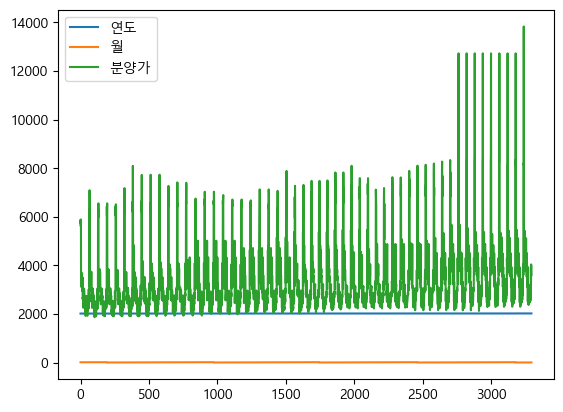

In [6]:
import matplotlib.pyplot as plt # 데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지
import platform # 시스템 정보를 확인할 때 사용하는 모듈

if platform.system() == 'Darwin': # 맥
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': # 윈도우
    plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': # 리눅스 (구글 콜랩)
    plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 폰트 깨짐 해결


df.plot()

In [7]:
plt.rcParams["figure.figsize"] = (12,9)

## line 그래프 : 데이터가 연속적인 경우 사용하기 적합  
        예)주가 데이터


<Axes: >

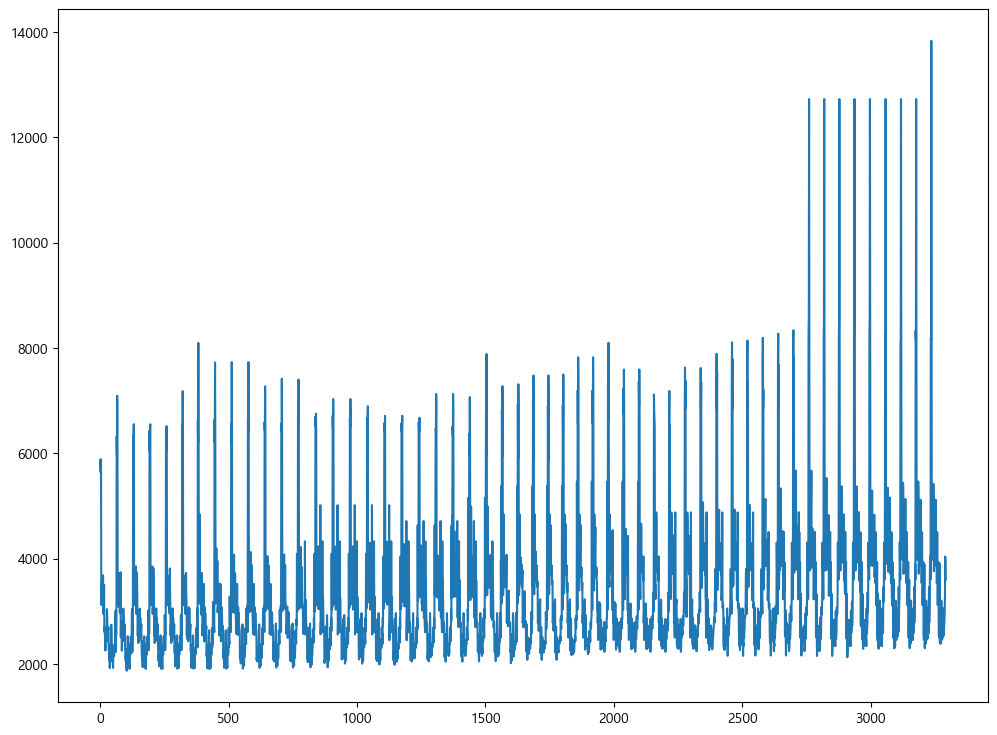

In [8]:
df['분양가'].plot(kind='line')

In [9]:
df_seoul = df.loc[df['지역'] == '서울']

In [11]:
df_seoul

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3178,서울,102㎡초과,2020,1,8779
3234,서울,60㎡이하,2020,2,8193
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835


In [12]:
df_seoul_year = df_seoul.groupby('연도').mean()

C:\Users\admin\AppData\Local\Temp\ipykernel_14224\3064911928.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seoul_year = df_seoul.groupby('연도').mean()


In [13]:
df_seoul_year

,월,분양가
연도,,
2015,11.0,6201.000000
2016,6.5,6674.520833
2017,6.5,6658.729167
2018,6.5,7054.687500
2019,6.5,8735.083333
2020,1.5,9647.375000


<Axes: xlabel='연도'>

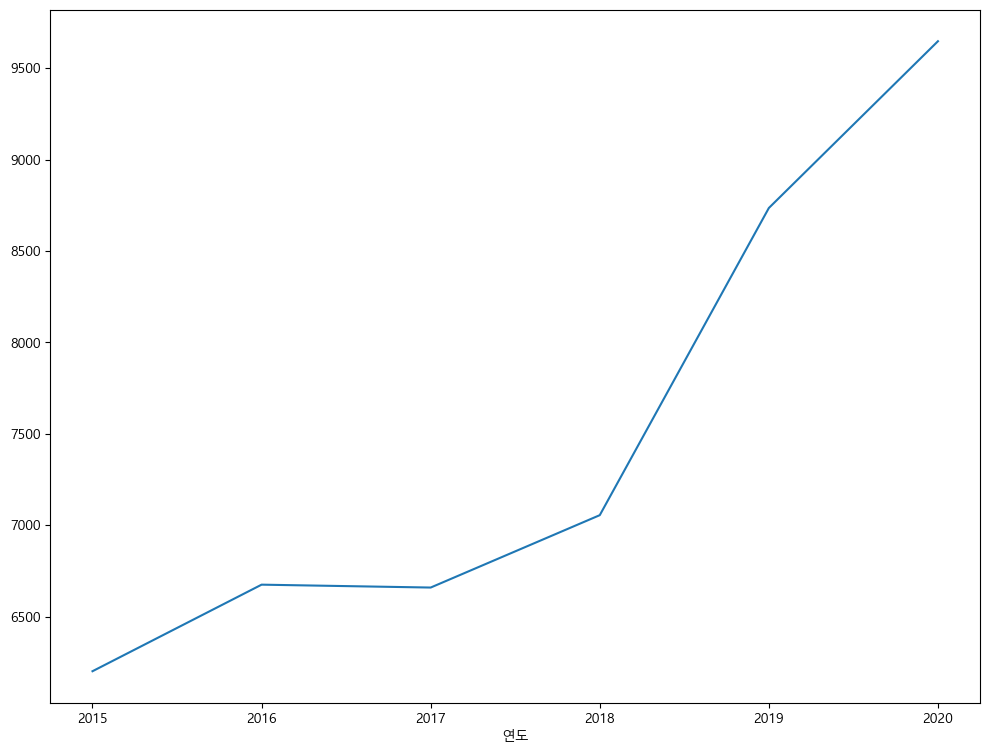

In [14]:
df_seoul_year['분양가'].plot(kind='line')

## bar 그래프 : 그룹별로 비교할 때 유용

In [15]:
df.groupby('지역')['분양가'].mean()

지역
강원    2448.156863
경기    4133.952830
경남    2858.932367
경북    2570.465000
광주    3055.043750
대구    3679.620690
대전    3176.127389
부산    3691.981132
서울    7308.943396
세종    2983.543147
울산    2990.373913
인천    3684.302885
전남    2326.250000
전북    2381.416268
제주    3472.677966
충남    2534.950000
충북    2348.183962
Name: 분양가, dtype: float64

<Axes: ylabel='지역'>

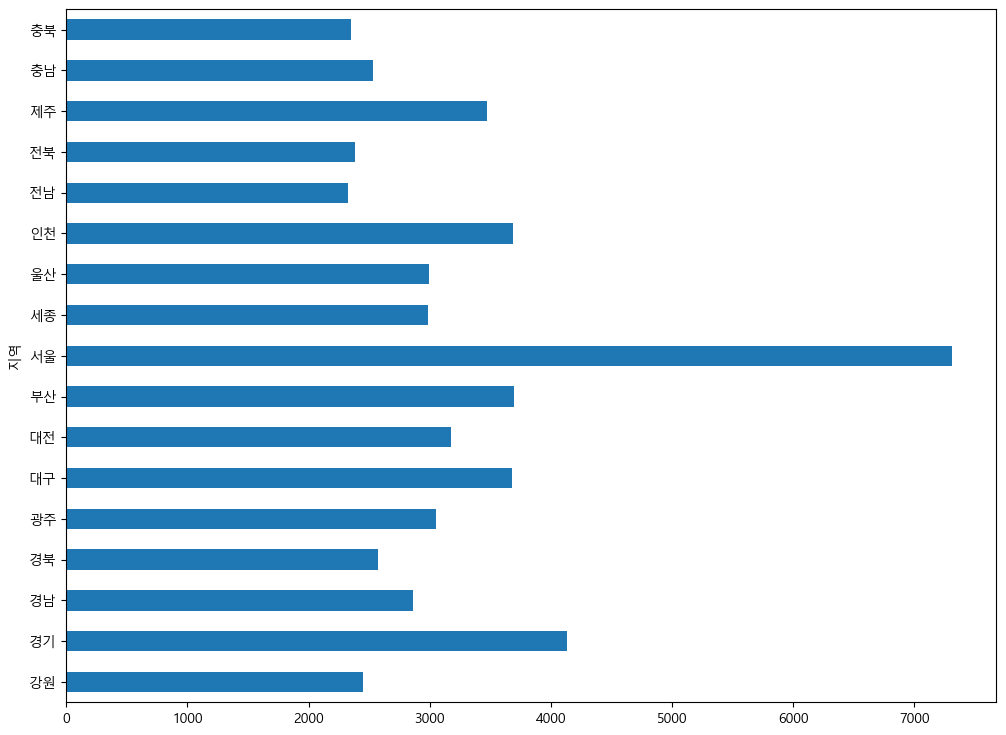

In [17]:
df.groupby('지역')['분양가'].mean().plot(kind='barh')

## 히스토그램 : 분포-빈도를 시각화  
가로축-분포, 세로축-빈도

<Axes: ylabel='Frequency'>

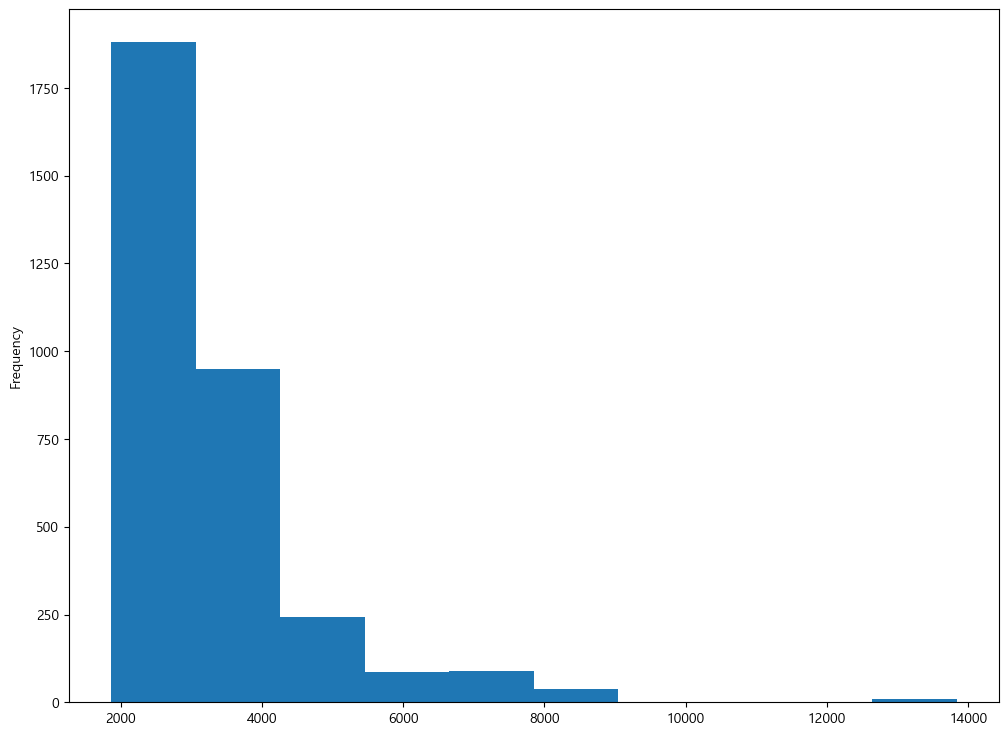

In [18]:
df['분양가'].plot(kind='hist')

## 커널 밀도 그래프(kde)
- 히스토그램과 유사하게 밀도를 보여주는 그래프
- 히스토그램과 유사한 모양새
- 부드러운 라인을 가짐

<Axes: ylabel='Density'>

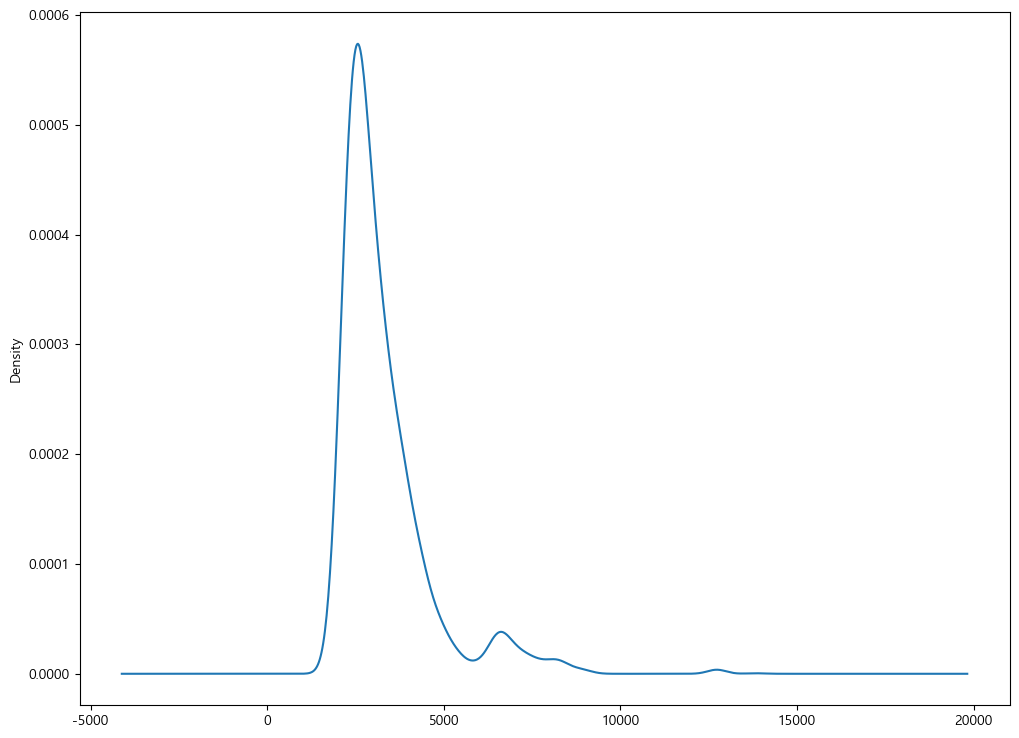

In [22]:
df['분양가'].plot(kind='kde')

## Hexbin
- 고밀도 산점도 그래프
- x와 y키 값을 넣어 주어야함
- x,y 값 모두 numeric한 값을 넣어 주어야 함
- 데이터의 밀도를 추정 

<Axes: xlabel='분양가', ylabel='연도'>

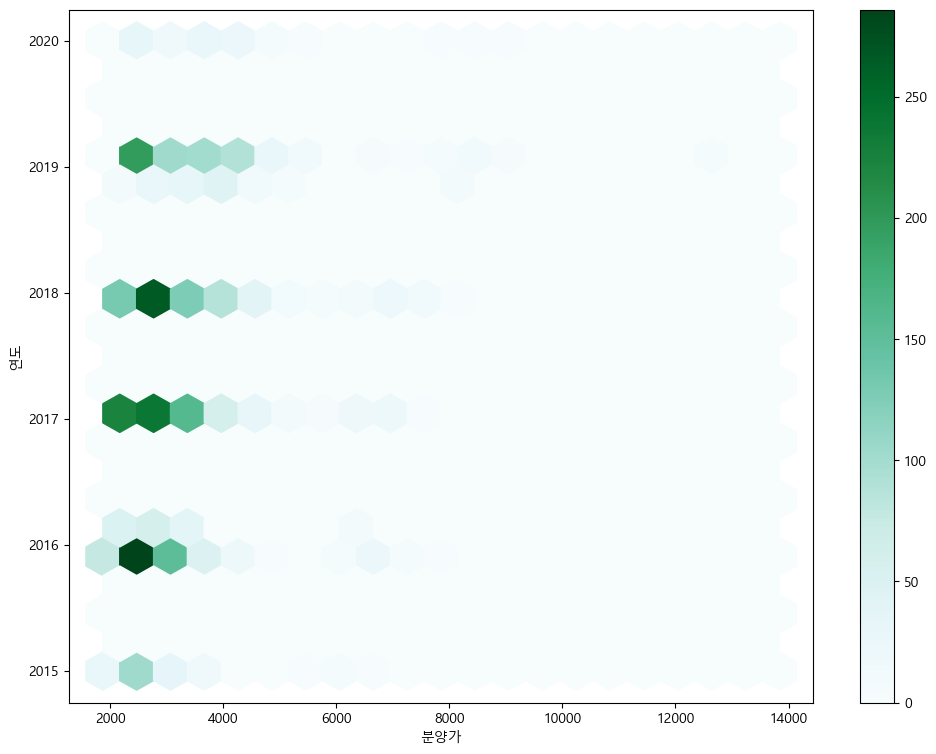

In [21]:
df.plot(kind='hexbin', x = '분양가', y= '연도',gridsize=20)

In [23]:
df_seoul

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3178,서울,102㎡초과,2020,1,8779
3234,서울,60㎡이하,2020,2,8193
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835


## BoxPlot : 데이터 outlier 감지할 때 많이 사용
- 5가지 요약 수치
- 최소값
- 제1사분위(25%) - Q1
- 제2사분위(50%) - Median
- 제3사분위(75%) - Q3
- 최대값

<Axes: >

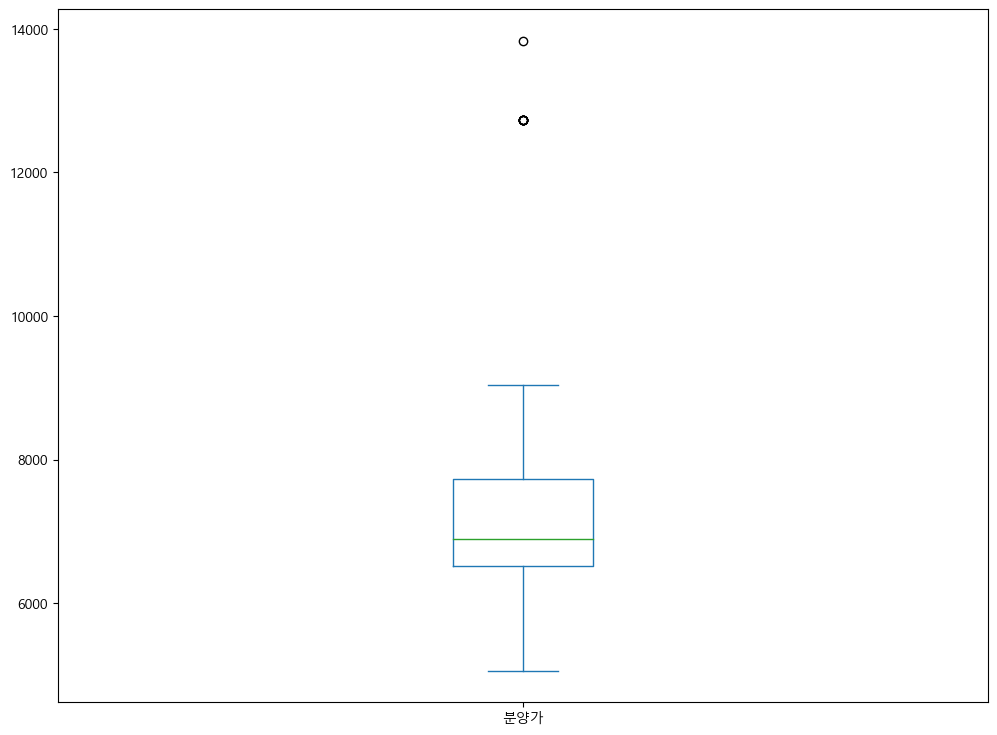

In [24]:
df_seoul['분양가'].plot(kind='box')

In [25]:
df_seoul.describe()

,연도,월,분양가
count,212.00000,212.000000,212.000000
mean,2017.45283,6.566038,7308.943396
std,1.31439,3.603629,1402.869496
min,2015.00000,1.000000,5061.000000
25%,2016.00000,3.000000,6519.750000
50%,2017.00000,7.000000,6895.500000
75%,2019.00000,10.000000,7732.000000
max,2020.00000,12.000000,13835.000000


## <font color = red>(IQR(Inter Quantile Range) = (3Q-1Q)*1.5</font>

In [26]:
IQR = (7732-6519.75) *1.5

In [27]:
IQR

1818.375

In [28]:
7732 + IQR

9550.375

In [29]:
6519 + IQR

8337.375

<Axes: xlabel='월'>

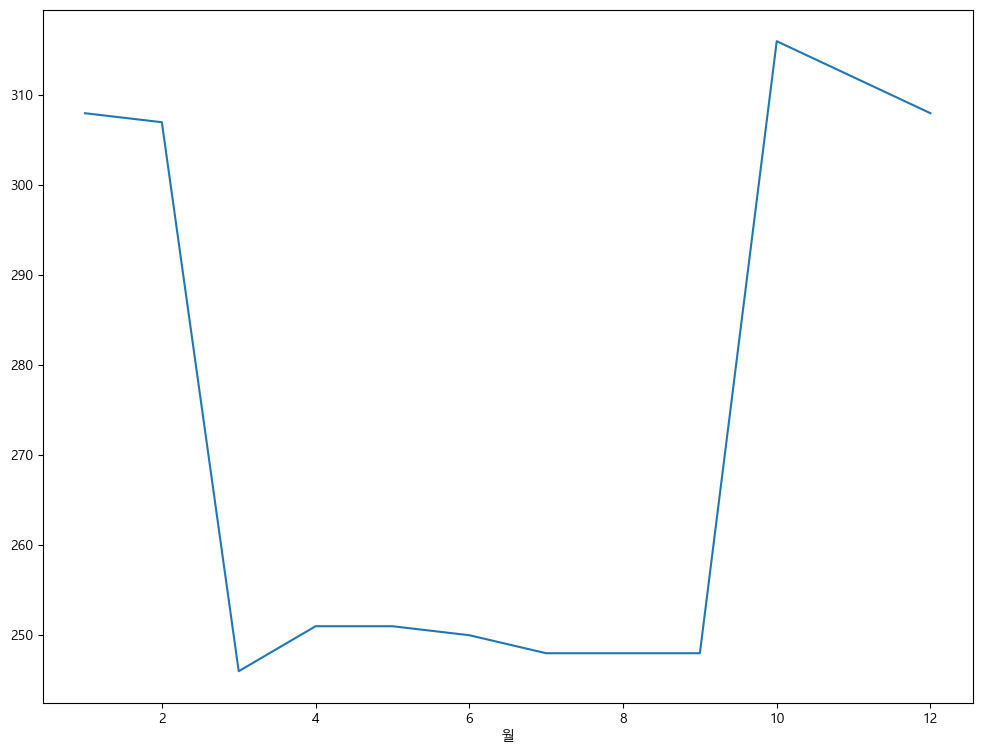

In [30]:
df.groupby('월')['분양가'].count().plot(kind='line')

<Axes: xlabel='월'>

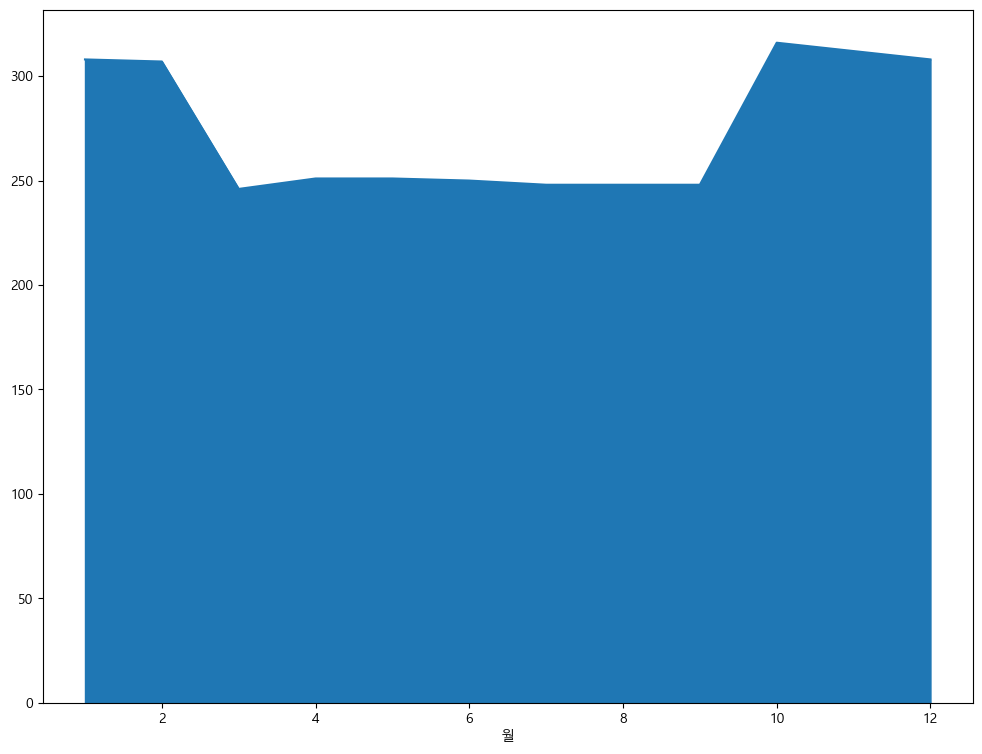

In [31]:
df.groupby('월')['분양가'].count().plot(kind='area')

## pie plot (파이 그래프)
- 데이터의 점유율을 보여줄 때 유용


<Axes: ylabel='분양가'>

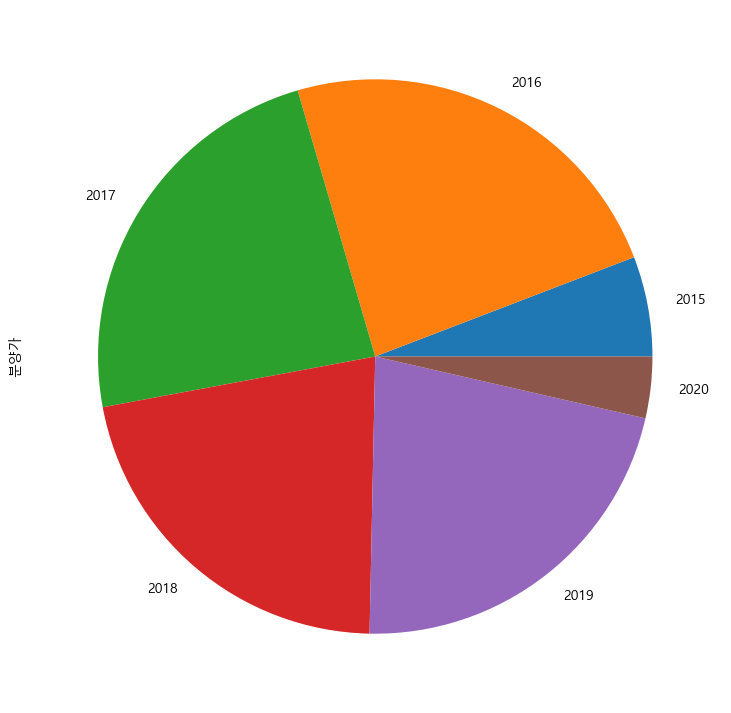

In [32]:
df.groupby('연도')['분양가'].count().plot(kind='pie')

## 산점도 그래프(scatter plot)
- 점으로 데이터를 표시
- x,y 값을 넣어 주어야 함(hexbin과 유사)
- x축과 y축을 지정해주면 그에 맞는 데이터 분포를 볼 수 있음
- 역시 numeric한 column 만 지정할 수 있음

<Axes: xlabel='월', ylabel='분양가'>

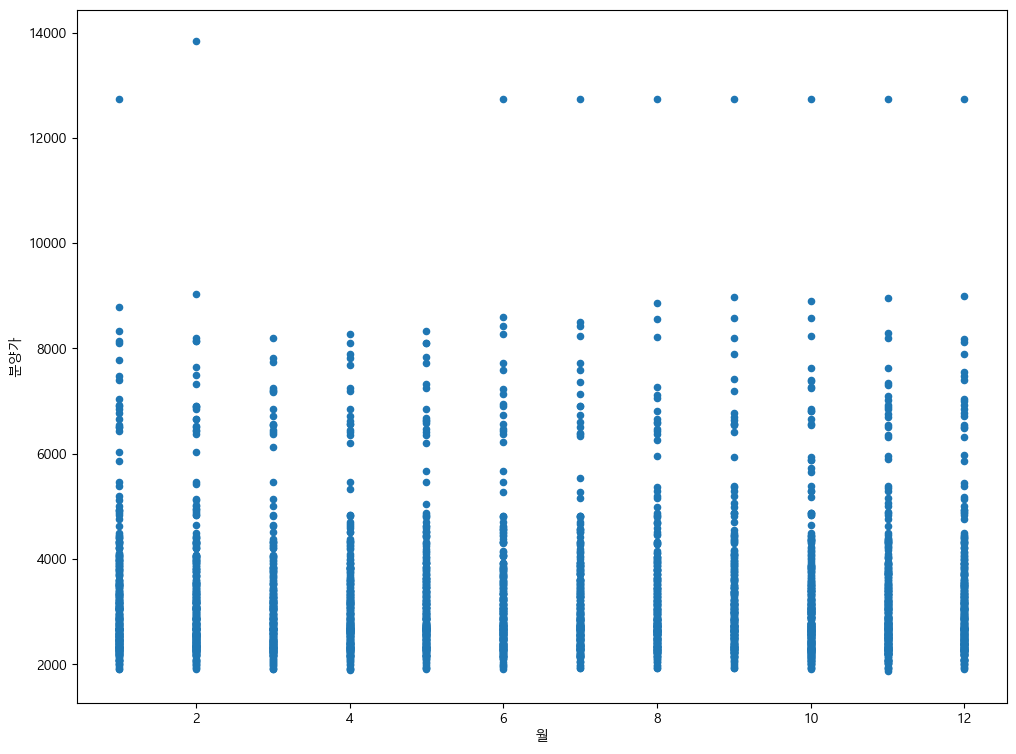

In [33]:
df.plot(x='월', y='분양가', kind='scatter')